# AlexNet(2012)의 개요 및 특징
- 활성화 함수로 `ReLU` 사용
- `MaxPooling` 적용
- `LRN(Local Response Normalization)`
  - 지금은 `Batch Normalization`으로 대체
- `Dropout`
- `Data Augmentation`

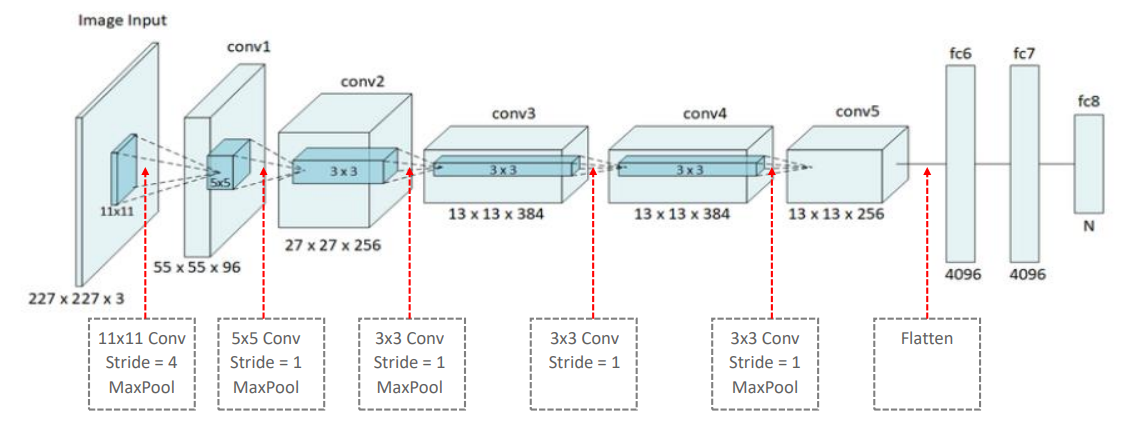

- `(11, 11)`, `(5, 5)` 같은 큰 사이즈의 커널을 사용
  - 커널의 크기가 큰 대신 `strides`를 늘임.
  - 층을 얇게 쌓음

In [ ]:
# Feature Extraction
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D

# Fully Connected Layer
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, GlobalAveragePooling2D

상황에 따라 무엇을 `import` 해야 할지는 외우는 것이 좋다.

- 1st Feature Extraction
  - 특징을 최대한 많이 보려고 함

- `stride = 4`인 이유
  - 특징이 많음 -> 연산이 많음 -> 큰 덩어리로 봄 -> 뭐라도 줄여보자

In [ ]:
# 입력층
input = Input(shape = (227, 227, 3)) # 위의 그림의 Input Data대로

# 1st Feature Extraction : 입력 이미지를 최대한 많이, 듬성등성 보기 -> Output Feature Map의 크기를 줄이는데 집중
x = Conv2D(filters=96, kernel_size=11, strides=4, padding='valid')(input)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=3, strides=2)(x) # 위에서 듬성듬성 봤으니 밑에서 겹쳐서 보면서 보정 시도

# 2nd Feature Extraction : Conv - ReLU - BN - MaxPooling
x = Conv2D(filters=256, kernel_size=5, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# 3rd, 4th Feature Extraction : 3x3 Conv을 2번 연속 시행
x = Conv2D(filters=384, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
# 위 그림에서 여기에는 MaxPooling2D가 없다.

x = Conv2D(filters=384, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# 5th : Conv 256차원
x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# Flatten
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Output
output = Dense(10, activation='softmax')(x)

뭔가 만들어지기는 한 듯?

- 옛날에는 위와 같은 순서가 아니었다고 한다.

```python
  x = Conv2D(filters=96, kernel_size=11, strides=4, padding='valid')(input)
  x = BatchNormalization(x)
  x = Activation('relu')(x)
```

- LRN을 사용하던 시절에는 Activation과 Normalization의 순서가 반대였다.

- 다른 논문에서는 `Activation - BacthNormalization - MAxPooling2D` 순이었다고...
  - BatchNormalization의 순서는 크게 상관이 없다.

In [ ]:
from tensorflow.keras.models import Model

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_6 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 256)       614656

위의 그림대로 잘 만들어졌다